# Showcase: the controlled rotation gate $C^{N-1} R_z(\alpha)$

In [18]:
from CompositeCRotGate import *
import numpy as np

Obtain the rotation angles $\phi_j$ for a specific controlled rotation gate:

In [19]:
n_qubits = 3
alpha = np.pi/2
return_mpmath = False

phis = crot_angles(n_qubits, alpha, return_mpmath )
print(phis)

{4: 4.863407230004668, 3: 1.2011081944219768, 2: 1.428518757224083, 1: 4.049405029043555, 0: 0.5119657015893608}


Check that this produces the correct gate. At the first value, where $\theta = -\pi$, we should find the rotation $\cos(\alpha/2) \mathbb{1} - i \sin(\alpha/2) Z$. 

In [20]:
thetas = np.arange( -1 * np.pi, np.pi, 2*np.pi / n_qubits ) 
rotations = [ evaluate_angle_sequence( phis, theta ) for theta in thetas ]

for theta, rot in zip(thetas, rotations):
    print( '\t theta = ', theta )
    print(  np.round( rot ,2) )


	 theta =  -3.141592653589793
[[ 0.71+0.71j -0.  +0.j  ]
 [ 0.  +0.j    0.71-0.71j]]
	 theta =  -1.0471975511965979
[[ 1.  +0.j  0.01+0.j]
 [-0.01+0.j  1.  -0.j]]
	 theta =  1.0471975511965974
[[ 1.  +0.j -0.01-0.j]
 [ 0.01-0.j  1.  -0.j]]


We can calculate the gate fidelity using 
$$ F = \frac{1}{\text{dim}} | \text{tr}( U_\text{obtained} U_\text{goal}^\dagger ) |. $$
We calculate it per subspace:

In [21]:
def fid( Uobt, Ugoal ):
    return (1/len(Uobt)) * np.abs( np.trace( Ugoal.dot( np.conjugate( np.transpose( Uobt )) ) ) )

# Let us first do the 'easy' cases (theta != -pi), which should be close to identity:
for theta, rot in zip( thetas[1:], rotations[1:] ) :
    print( '\t theta = ', theta )
    print( fid( rot, np.eye(2) ))
    
# The special case theta=-pi can come out either as a rotation with positive 
# or negative direction (exp( +/- i Z alpha )):
ugoal = np.cos( alpha/2 ) * np.eye(2) + 1j * np.sin( alpha/2 ) * np.eye(2) * (1,-1)
print( '\t theta = ', thetas[0] )
print( fid( rotations[0], ugoal ))
print( fid( rotations[0], np.conjugate( np.transpose( ugoal ) ) ) )

	 theta =  -1.0471975511965979
0.9999654002179617
	 theta =  1.0471975511965974
0.9999654002179621
	 theta =  -3.141592653589793
0.9999999994959823
3.1749571085093464e-05


# A different rotation per Hamming weight: $C^{N-1} R_z(\alpha_q)$

In [1]:
from CompositeCRotPerSubspace import *
import numpy as np

This time, we define a list `alphas` corresponding to weights $q=0, 1,  ..., \texttt{n_qubits}-1$. The function `crot_per_subspace` returns a dictionary of the form $ \{ E_0, \{ P_1, 1-P_1 \}, \{ P_2, 1-P_2 \}, ... \}$. 

The projectors $P_j$ define gates $E_j(\theta) = e^{i \theta} P_j + e^{-i \theta} (1-P_j)$. (For example, consider $P = |1><1|$, which leads to the conventional $Z$-rotation $R_z( 2 \theta )$.) We leave open how such gates can be decomposed into a standard gate set. 

In [7]:
alphas = [ -np.pi/3, 2, np.pi, -np.pi/4 ]
n_qubits = len(alphas)
return_mpmath = False

In [8]:
gate_list = crot_per_subspace( alphas, return_mpmath )

print( '\t E_0 = ' )
print( np.round( gate_list[0], 3 ) )
print( '\t P_1 = ')
print( gate_list[1][0] )
print( '\t Id - P_1 = ')
print( gate_list[1][1] )

	 E_0 = 
[[ 0.866+0.008j -0.   +0.5j  ]
 [ 0.   +0.5j    0.866-0.008j]]
	 P_1 = 
[[ 0.47339364+0.j         -0.49719468+0.04571163j]
 [-0.49719468-0.04571163j  0.52660636+0.j        ]]
	 Id - P_1 = 
[[0.52660636+0.j         0.49719468-0.04571163j]
 [0.49719468+0.04571163j 0.47339364+0.j        ]]


Using the function `evaluate_gate_sequence`, we can see what the resultant circuit is, for various values of $\theta$:

In [9]:
thetas = np.linspace(0, np.pi, n_qubits , endpoint=True)
rotations = [ evaluate_gate_sequence( gate_list, theta ) for theta in thetas ]

for theta, rot in zip(thetas, rotations):
    print( '\t theta = ', theta )
    print(  np.round( rot ,2) )

	 theta =  0.0
[[ 0.87+0.01j -0.  +0.5j ]
 [ 0.  +0.5j   0.87-0.01j]]
	 theta =  1.0471975511965976
[[ 0.54+0.j    0.01-0.84j]
 [-0.01-0.84j  0.54-0.j  ]]
	 theta =  2.0943951023931953
[[ 0.  -0.j  0.01-1.j]
 [-0.01-1.j  0.  +0.j]]
	 theta =  3.141592653589793
[[ 0.92+0.01j -0.  +0.38j]
 [ 0.  +0.38j  0.92-0.01j]]


As before, we can calculate the fidelity at each of the revelant values of $\theta$:

In [10]:
def fid( Uobt, Ugoal ):
    return (1/len(Uobt)) * np.abs( np.trace( Ugoal.dot( np.conjugate( np.transpose( Uobt )) ) ) )


for theta, alpha, rot in zip( thetas, alphas, rotations) :
    ugoal = np.eye(2) * np.cos(alpha/2) - 1j * np.sin(alpha/2) * np.eye(2)[[1,0]]
    print( '\t theta = ', theta )
    print( fid( rot, ugoal ))

	 theta =  0.0
0.9999668414152068
	 theta =  1.0471975511965976
0.9999682857336627
	 theta =  2.0943951023931953
0.9999674402346695
	 theta =  3.141592653589793
0.9999662691792739


### Let's dig under the hood. What are the Laurent polynomials $A(\theta), B(\theta)$ we generate? 


The function `crot_per_subspace_series` is used to fit low-degree Laurent series for A and B that satisfy the constraints set by `alphas`. 

In [11]:
a_laurent, b_laurent = crot_per_subspace_series( alphas ) 

print(a_laurent)

{0: 0.4784182580053343, 1: 0.0670066912696238, -1: 0.0670066912696238, 2: 0.1388447367141762, -2: 0.1388447367141762, 3: -0.09487156170526062, -3: -0.09487156170526062, 4: 0.06942236835708805, -4: 0.06942236835708805, 5: 0.013401338253924807, -5: 0.013401338253924807}


We plot these Laurent polynomials, and also indicate the values they are supposed to have (according to `alphas`) with stars.

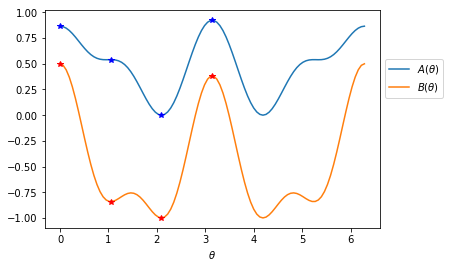

In [49]:
import matplotlib.pyplot as plt

def evaluate_laurent_dict( poly_dict, theta ):
    return sum([ coeff * np.exp( -1j * k * theta ) for k, coeff in poly_dict.items() ])



# Evaluate the Laurent polynomials at many points along the x-axis.
theta_axis = np.linspace( 0, 2* np.pi, 100, endpoint=True)
a_vals = [ evaluate_laurent_dict( a_laurent, theta) for theta in theta_axis ] 
b_vals = [ evaluate_laurent_dict( b_laurent, theta) for theta in theta_axis ] 

# Plot the obtained pairs of (x,y) values.
f,ax=plt.subplots(figsize=(6,4) )

plt.plot( theta_axis, np.real( a_vals ), label=r'$A(\theta)$' ) 
plt.plot( theta_axis, np.real( b_vals ), label=r'$B(\theta)$' ) 
plt.plot( thetas, [ np.cos(alpha/2) for alpha in alphas ], 'b*' )
plt.plot( thetas, [ np.sin(-alpha/2) for alpha in alphas ], 'r*' )
plt.legend( bbox_to_anchor=(1,.8) )
ax.set_xlabel(r'$\theta$')

plt.show()

Similarly, we can see if our obtained gate has the same behaviour. We retrieve the $X$-component of an SU(2) unitary $U$ through 

$$ \text{x-component} = B(\theta) = \frac{1}{2} \text{tr}( X U ) $$

and similarly for $Y$, $Z$ and $\mathbb{1}$. 

In [24]:
gate_vals = [ evaluate_gate_sequence( gate_list, theta) for theta in theta_axis ]

pauli_x = np.eye(2)[[1,0]]
pauli_y = np.eye(2)[[1,0]] * (1j, -1j)
pauli_z = np.eye(2) * (1,-1)

id_component = [ .5 * np.trace( gate ) for gate in gate_vals ]
x_component = [ .5 * np.trace( gate.dot( pauli_x ) ) for gate in gate_vals ]
y_component = [ .5 * np.trace( gate.dot( pauli_y ) ) for gate in gate_vals ]
z_component = [ .5 * np.trace( gate.dot( pauli_z ) ) for gate in gate_vals ]

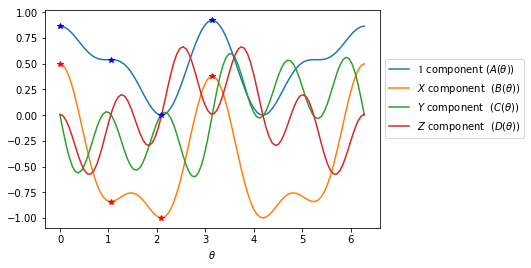

In [50]:
f,ax=plt.subplots(figsize=(6,4) )
plt.plot( theta_axis, np.real( id_component ), label=r'$\mathbb{1}$ component ($A(\theta)$)' ) 
plt.plot( theta_axis, np.imag( x_component ), label=r'$X$ component  ($B(\theta)$)' )
plt.plot( theta_axis, np.imag( y_component ), label=r'$Y$ component  ($C(\theta)$)' )
plt.plot( theta_axis, np.imag( z_component ), label=r'$Z$ component  ($D(\theta)$)' )
plt.plot( thetas, [ np.cos(alpha/2) for alpha in alphas ], 'b*' )
plt.plot( thetas, [ np.sin(-alpha/2) for alpha in alphas ], 'r*' )
plt.legend( bbox_to_anchor=(1,.8) )

ax.set_xlabel(r'$\theta$')
plt.show()